# Task 1



## Objectives

For dataset **Fashion MNIST**:

1. Split training set into training and validation set (90-10)
2. Experiment with:
    - Weight Initializations
    - Activation Functions
    - Try different optimizers
    - Regularizations
      - **L1**
      - **L2**
      - **Dropout**
      - **No Dropout**
    - Optimizing Hyperparameters (Keep the 3 best)
   
3. Additionally experiment with,
    - Adding/Removing layers to the network
    - Number of filters
    - Size of filters

Train **CIFAR-10** to get a base-level performance.
With the 3 best hyperparameters, train **CIFAR-10**.
Check if performance gains translate to this dataset.

## Implementation

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Pre-processing dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Rescale pixel values to [0,1]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [5]:
# Define the class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

### MLP: Base level

#### Creating the model

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### Compiling the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

#### Training the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

#### Evaluating the model

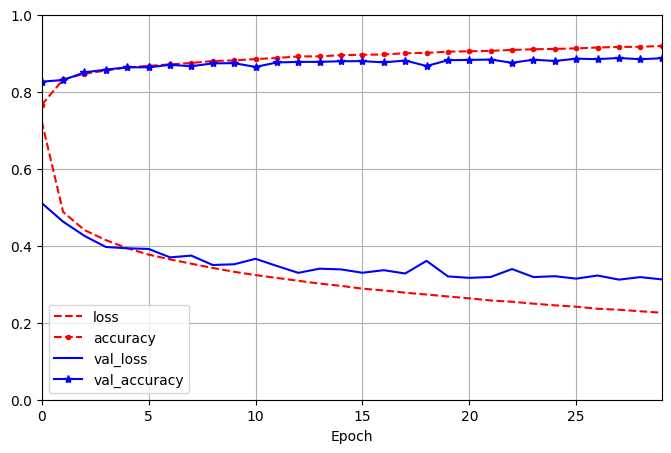

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3244 - accuracy: 0.8862


[0.3244295120239258, 0.8862000107765198]

### MLP: Different Initilizers


#### Normal Distribution Weight Initializer

Initializer that generates tensors with a normal distribution.

In [ ]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="random_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="random_normal"),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="random_normal")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

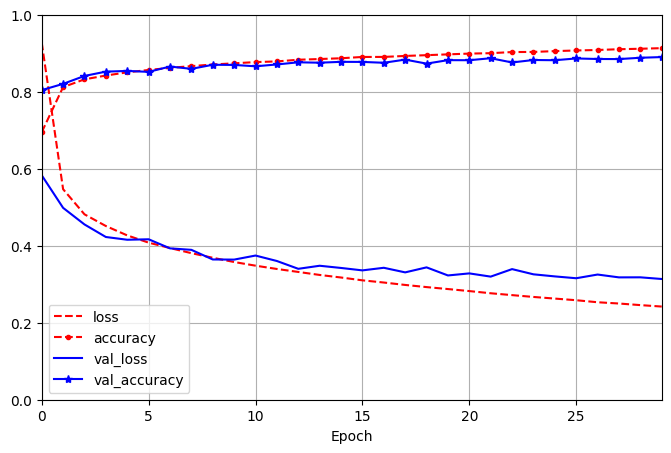

313/313 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8822


[0.33027005195617676, 0.8822000026702881]

In [ ]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### Uniform Distribution Weight Initializer

Initializer that generates tensors with a uniform distribution.

In [ ]:
# Uniform Distribution Initiliazer [-0.5,0.5]
initializer = tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=42)

# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer=initializer),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer=initializer)
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

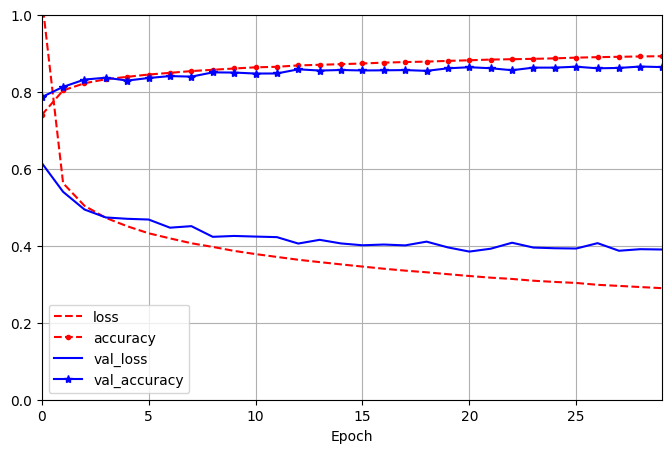

313/313 [==============================] - 1s 3ms/step - loss: 0.4025 - accuracy: 0.8588


[0.40249696373939514, 0.8587999939918518]

In [ ]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

### MLP: Different Activations


#### Sigmoid Activation

In [ ]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

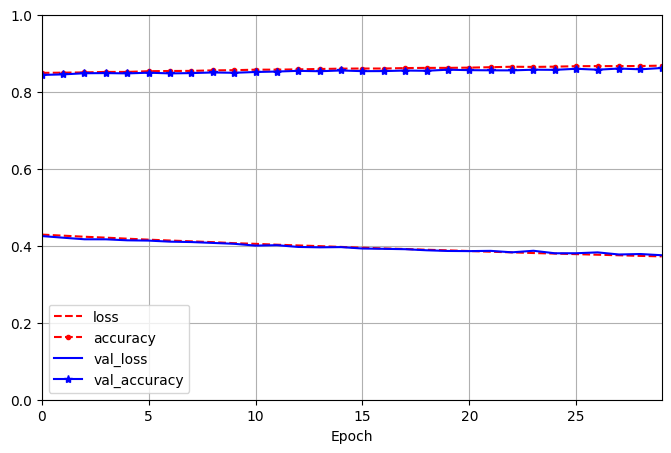

313/313 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8507


[0.41620001196861267, 0.8507000207901001]

In [23]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### TanH Activation

In [29]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="tanh"),
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

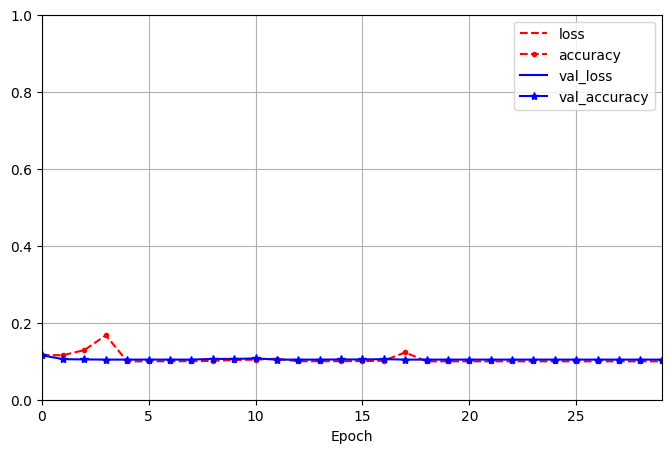

313/313 [==============================] - 1s 3ms/step - loss: 5.3031 - accuracy: 0.1000


[5.303055763244629, 0.10000000149011612]

In [31]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### Exponential Activation

In [33]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="exponential"),
    tf.keras.layers.Dense(100, activation="exponential"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

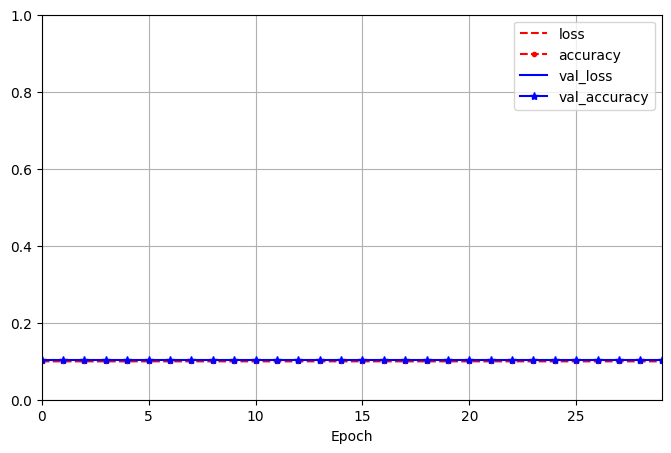

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [35]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

### MLP: Different Optimizers

In [6]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### SGD with Momentum

In [41]:
# Compiling the model
optimizer = tf.keras.optimizers.SGD(momentum=0.5)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

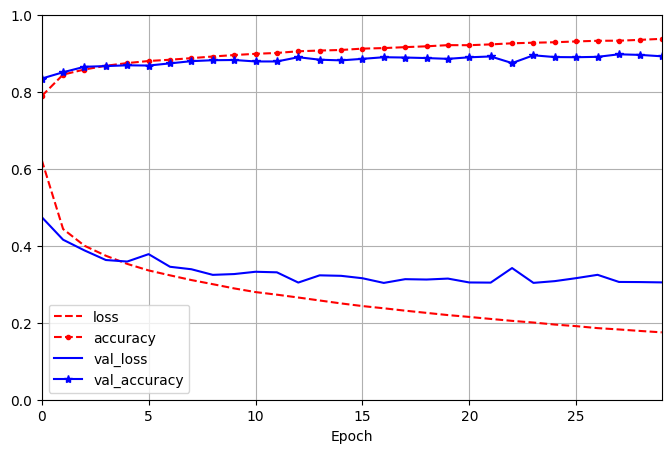

313/313 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.8922


[0.3202504813671112, 0.8921999931335449]

In [43]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### SGD with Nesterov Momentum

In [44]:
# Compiling the model
optimizer = tf.keras.optimizers.SGD(momentum=0.5, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

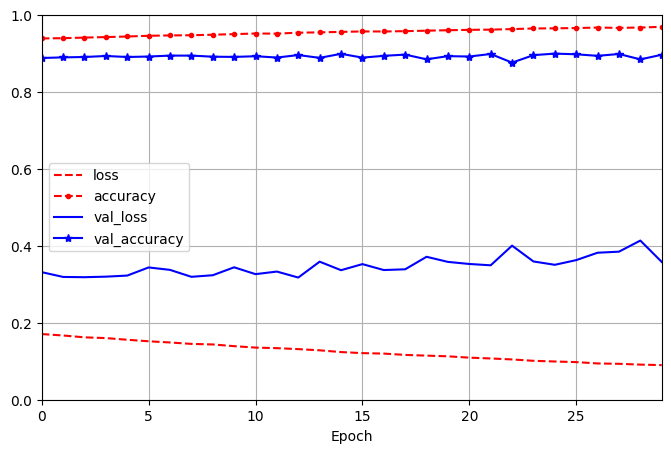

313/313 [==============================] - 1s 3ms/step - loss: 0.3786 - accuracy: 0.8914


[0.37864750623703003, 0.8913999795913696]

In [46]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### Adam

In [9]:
# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

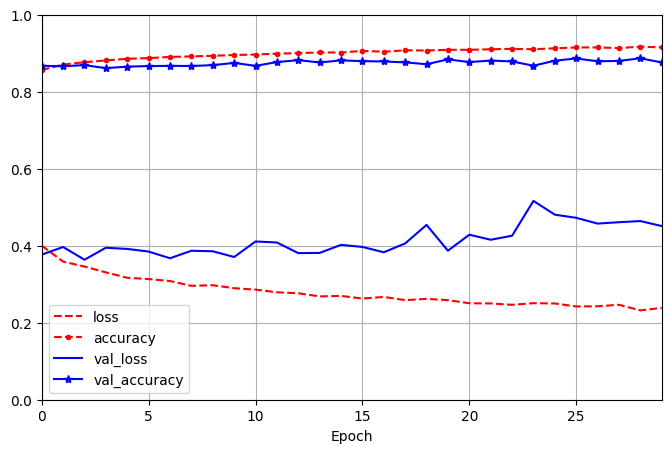

313/313 [==============================] - 1s 2ms/step - loss: 0.4896 - accuracy: 0.8705


[0.4895561635494232, 0.8705000281333923]

In [11]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)